In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
# For Oversampling
!pip install imbalanced-learn

In [4]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
card_df = pd.read_csv('creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [6]:
card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# Time -> Drop 
# Class 0 -> 정상, 1 -> Fraud
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None) :
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [8]:
def get_train_test_dataset(df=None) :
    df_copy = get_preprocessed_df(df)
    x_features = df_copy.iloc[:, :-1]
    y_labels = df_copy.iloc[:, -1]
    
    x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, test_size=0.3, stratify=y_labels)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = get_train_test_dataset(card_df)

In [9]:
print(y_train.value_counts() / y_train.shape[0] * 100)
print(y_test.value_counts() / y_test.shape[0] * 100)

0    99.827451
1     0.172549
Name: Class, dtype: float64
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, f1-score: {3: .4f}'.format(accuracy, precision, recall, f1))

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
get_clf_eval(y_test, lr_pred)

Confusion Matrix
[[85285    10]
 [   57    91]]
Accuracy: 0.9992, Precision: 0.9010, Recall: 0.6149, f1-score:  0.7309


/Users/thomo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None) :
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    get_clf_eval(tgt_test, pred)

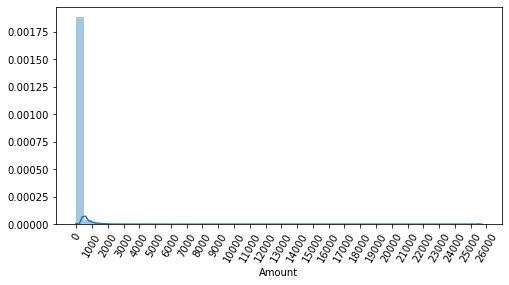

In [12]:
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [15]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None) :
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [16]:
x_train, x_test, y_train, y_test = get_train_test_dataset(card_df)

In [29]:
import lightgbm as lgb

OSError: dlopen(/Users/thomo/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/thomo/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found

In [17]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, x_train, x_test, y_train, y_test)

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, tree_method='gpu_exact')
get_model_train_eval(lgbm_clf, x_train, x_test, y_train, y_test)

Confusion Matrix
[[85276    19]
 [   53    95]]
Accuracy: 0.9992, Precision: 0.8333, Recall: 0.6419, f1-score:  0.7252


NameError: name 'LGBMClassifier' is not defined

In [18]:
def get_preprocessed_df(df=None) :
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [19]:
x_train, x_test, y_train, y_test = get_train_test_dataset(card_df)

lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, x_train, x_test, y_train, y_test)

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, tree_method='gpu_exact', verbose=1)
get_model_train_eval(lgbm_clf, x_train, x_test, y_train, y_test)

Confusion Matrix
[[85277    18]
 [   50    98]]
Accuracy: 0.9992, Precision: 0.8448, Recall: 0.6622, f1-score:  0.7424


NameError: name 'LGBMClassifier' is not defined

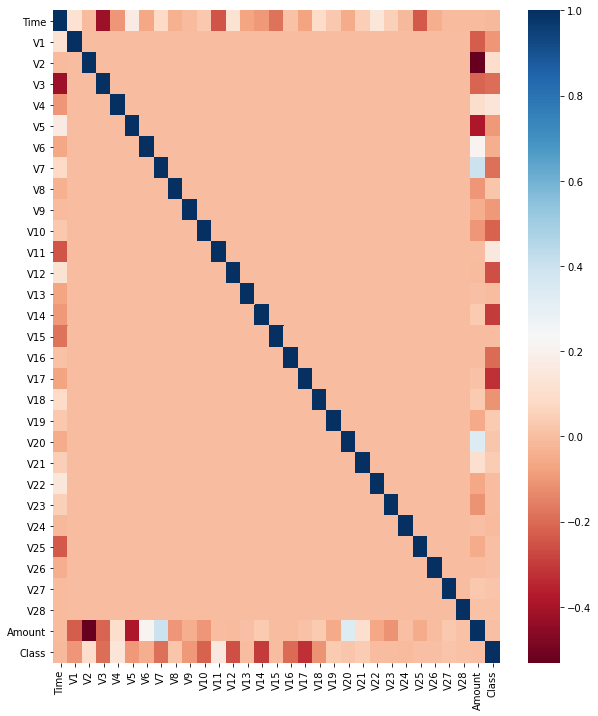

In [18]:
plt.figure(figsize=(10, 12))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [20]:
def get_outlier(df=None, column=None, weight=1.5) :
    fraud = df[df.Class == 1][column]
    q_25 = np.percentile(fraud.values, 25)
    q_75 = np.percentile(fraud.values, 75)
    
    iqr = q_75 - q_25
    iqr_weight = iqr * weight
    lowest_val = q_25 - iqr_weight
    highest_val = q_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [21]:
outlier_index = get_outlier(card_df, 'V14')
print(outlier_index)

Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [22]:
def get_preprocessed_df(df=None) :
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    outlier_index = get_outlier(card_df, 'V14')
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

In [23]:
x_train, x_test, y_train, y_test = get_train_test_dataset(card_df)

lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, x_train, x_test, y_train, y_test)

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, tree_method='gpu_exact', verbose=1)
get_model_train_eval(lgbm_clf, x_train, x_test, y_train, y_test)

Confusion Matrix
[[85279    16]
 [   56    90]]
Accuracy: 0.9992, Precision: 0.8491, Recall: 0.6164, f1-score:  0.7143


NameError: name 'LGBMClassifier' is not defined

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_over, y_train_over = smote.fit_sample(x_train, y_train)
print(y_train.value_counts())
print(pd.Series(y_train_over).value_counts())

0    199020
1       342
Name: Class, dtype: int64
1    199020
0    199020
Name: Class, dtype: int64


In [27]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, x_train_over, x_test, y_train_over, y_test)

Confusion Matrix
[[83103  2192]
 [   10   136]]
Accuracy: 0.9742, Precision: 0.0584, Recall: 0.9315, f1-score:  0.1099


In [28]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1) :
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.legend()
    plt.grid()
    plt.show()

In [24]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:, 1])

NameError: name 'precision_recall_curve_plot' is not defined

In [25]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False, tree_method='gpu_exact', verbose=1)
get_model_train_eval(lgbm_clf, x_train_over, x_test, y_train_over, y_test)

NameError: name 'LGBMClassifier' is not defined